# Factorial Design

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-Factor-ANOVA" data-toc-modified-id="Two-Factor-ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two-Factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-Battery-Data" data-toc-modified-id="Load-Battery-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Battery Data</a></span></li><li><span><a href="#Model-fitting-and-ANOVA-table" data-toc-modified-id="Model-fitting-and-ANOVA-table-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model fitting and ANOVA table</a></span></li><li><span><a href="#Interaction-plot" data-toc-modified-id="Interaction-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interaction plot</a></span></li><li><span><a href="#Model-assumption-check" data-toc-modified-id="Model-assumption-check-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model assumption check</a></span></li><li><span><a href="#Tukey-HSD-Test-for-specific-factor-level" data-toc-modified-id="Tukey-HSD-Test-for-specific-factor-level-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Tukey HSD Test for specific factor level</a></span><ul class="toc-item"><li><span><a href="#Compute-margin-error-for-C.I." data-toc-modified-id="Compute-margin-error-for-C.I.-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Compute margin error for C.I.</a></span></li></ul></li><li><span><a href="#Your-Turn----Activity-II:-Missile-System-and-Propellant-Type" data-toc-modified-id="Your-Turn----Activity-II:-Missile-System-and-Propellant-Type-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Your Turn -- Activity II: Missile System and Propellant Type</a></span></li></ul></li><li><span><a href="#Three-factor-ANOVA" data-toc-modified-id="Three-factor-ANOVA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Three-factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-data-and-fit-model" data-toc-modified-id="Load-data-and-fit-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data and fit model</a></span></li><li><span><a href="#Main-and-interaction-effect-plots" data-toc-modified-id="Main-and-interaction-effect-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Main and interaction effect plots</a></span></li><li><span><a href="#Your-Turn----Activity-III:-Exercise-Tolerance" data-toc-modified-id="Your-Turn----Activity-III:-Exercise-Tolerance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Your Turn -- Activity III: Exercise Tolerance</a></span></li></ul></li></ul></div>

In [ ]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Two-Factor ANOVA

### Load Battery Data

In [ ]:
import pandas as pd

battery_data = pd.read_excel('/content/lect05-factorial.xlsx', 
                             sheet_name='Battery',header=0)
battery_data

,Lifetime,Material,Temp
0,130,M1,T015
1,155,M1,T015
2,74,M1,T015
3,180,M1,T015
4,34,M1,T070
5,40,M1,T070
6,80,M1,T070
7,75,M1,T070
8,20,M1,T125
9,70,M1,T125


### Model fitting and ANOVA table

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Lifetime ~ Material + Temp + Material:Temp' 
mdl = ols(formula, data=battery_data).fit()
aov_table = anova_lm(mdl, typ=1) 
aov_table #fit model anova table

,df,sum_sq,mean_sq,F,PR(>F)
Material,2.0,10683.722222,5341.861111,7.911372,1.976083e-03
Temp,2.0,39118.722222,19559.361111,28.967692,1.908596e-07
Material:Temp,4.0,9613.777778,2403.444444,3.559535,1.861117e-02
Residual,27.0,18230.750000,675.212963,NaN,NaN


### Interaction plot

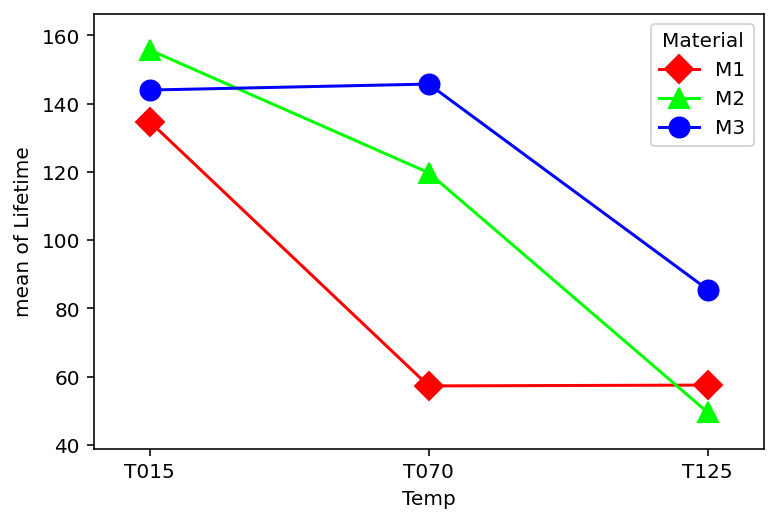

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(battery_data.Temp,   #B
                       battery_data.Material,  #A
                       battery_data.Lifetime,  #response
                       markers=['D','^','o'], ms=10) 
#ไม่พาราเเลวกัน เลือก 3 ดีสุดเพราะเซนซิทีฟน้อยสุดค่าเปลี่ยนน้อยสุด 1-2,1-3ต่าง2-3ไม่ต่าง

### Model assumption check

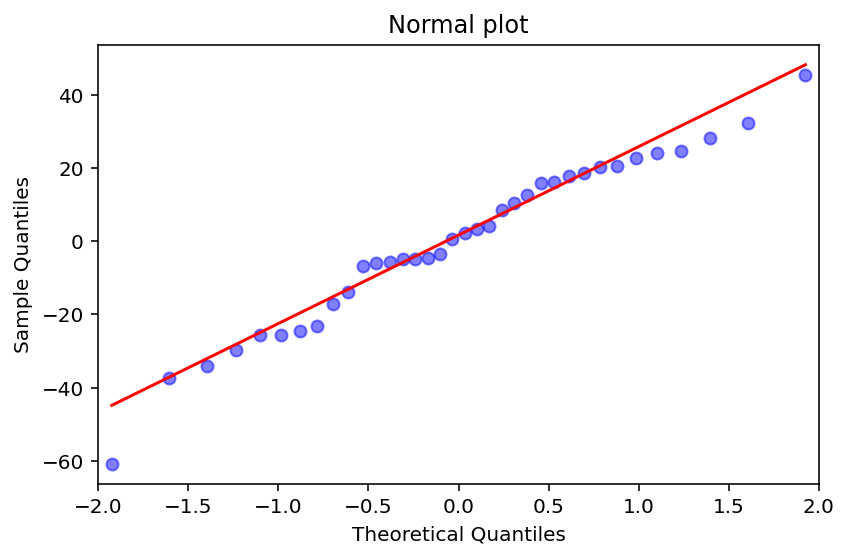

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

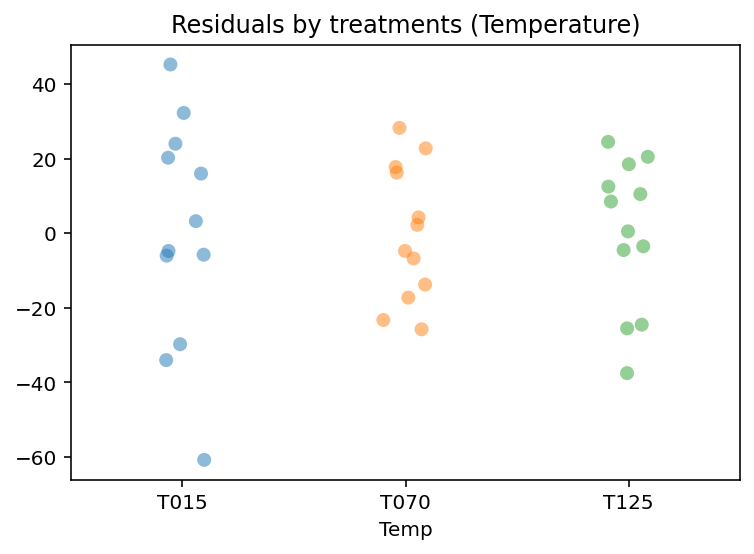

In [ ]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Temp'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Temperature)')
pass;

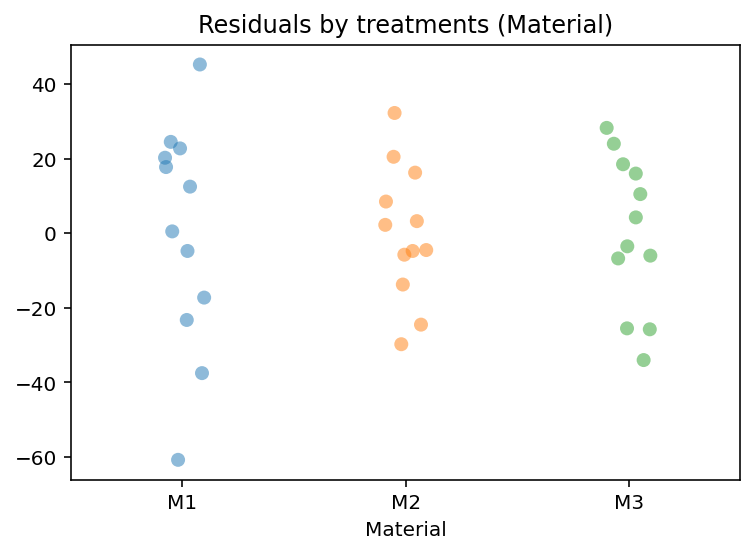

In [ ]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Material'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Material)')
pass;

### Tukey HSD Test for specific factor level

#### Compute margin error for C.I.

In [ ]:
from statsmodels.stats.libqsturng import qsturng

a = len(battery_data.Material.unique())
f = mdl.df_resid
n = battery_data.groupby(['Material','Temp']).count().reset_index().iloc[0,-1]

In [ ]:
alpha=0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl.mse_resid/n)

print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 3.51
Margin error: 45.55


Compare the margin error to the mean differences to determine if the mean differences are significant.

###  Your Turn -- Activity II: Missile System and Propellant Type  

In [ ]:
missile_data = pd.read_excel('/content/lect05-factorial.xlsx', 
                             sheet_name='Missile',header=0)
missile_data

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4
8,32.0,S2,P1
9,33.2,S2,P1


In [ ]:
formula = 'BurningRate ~ System + Propellant + System:Propellant'
mdl2 = ols(formula, data=missile_data).fit()
aov_table = anova_lm(mdl2, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
System,2.0,14.523333,7.261667,5.844400,0.016898
Propellant,3.0,40.081667,13.360556,10.752962,0.001020
System:Propellant,6.0,22.163333,3.693889,2.972949,0.051168
Residual,12.0,14.910000,1.242500,NaN,NaN


In [ ]:
mdl2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                   OLS                  Adj. R-squared:         0.688  
Dependent Variable:      BurningRate          AIC:                    80.6845
Date:                    2021-09-29 18:58     BIC:                    94.8212
No. Observations:        24                   Log-Likelihood:         -28.342
Df Model:                11                   F-statistic:            5.617  
Df Residuals:            12                   Prob (F-statistic):     0.00299
R-squared:               0.837                Scale:                  1.2425 
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     33.3500   0.7882 42.3119 0.0000 31.6327 35.0673
System[T.S2]                  -0.7500   1.1147 -0.6728 0.5138 -3.1787  1.6787
System[T.S3]                  -4.5000   1.1147 -4.0371 0.0016 -6.9287 -2.0713
Propellant[T.P2]              -1.9000   1.1147 -1.7045 0.1140 -4.3287  0.5287
Propellant[T.P3]              -5.1000   1.1147 -4.5753 0.0006 -7.5287 -2.6713
Propellant[T.P4]              -4.4000   1.1147 -3.9473 0.0019 -6.8287 -1.9713
System[T.S2]:Propellant[T.P2] -0.7000   1.5764 -0.4441 0.6649 -4.1347  2.7347
System[T.S3]:Propellant[T.P2]  1.1500   1.5764  0.7295 0.4797 -2.2847  4.5847
System[T.S2]:Propellant[T.P3]  0.9000   1.5764  0.5709 0.5786 -2.5347  4.3347
System[T.S3]:Propellant[T.P3]  4.7500   1.5764  3.0132 0.0108  1.3153  8.1847
System[T.S2]:Propellant[T.P4] -0.5000   1.5764 -0.3172 0.7566 -3.9347  2.9347
System[T.S3]:Propellant[T.P4]  4.5000   1.5764  2.8546 0.0145  1.0653  7.9347
-----------------------------------------------------------------------------
Omnibus:                  0.003            Durbin-Watson:               2.467
Prob(Omnibus):            0.999            Jarque-Bera (JB):            0.179
Skew:                     0.000            Prob(JB):                    0.915
Kurtosis:                 2.577            Condition No.:               18   
=============================================================================

"""

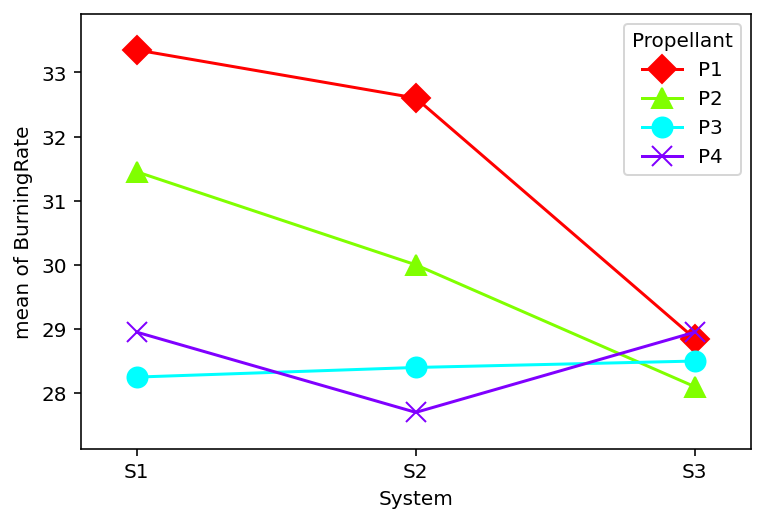

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(missile_data.System, 
                       missile_data.Propellant, 
                       missile_data.BurningRate, 
                       markers=['D','^','o','x'], ms=10) 

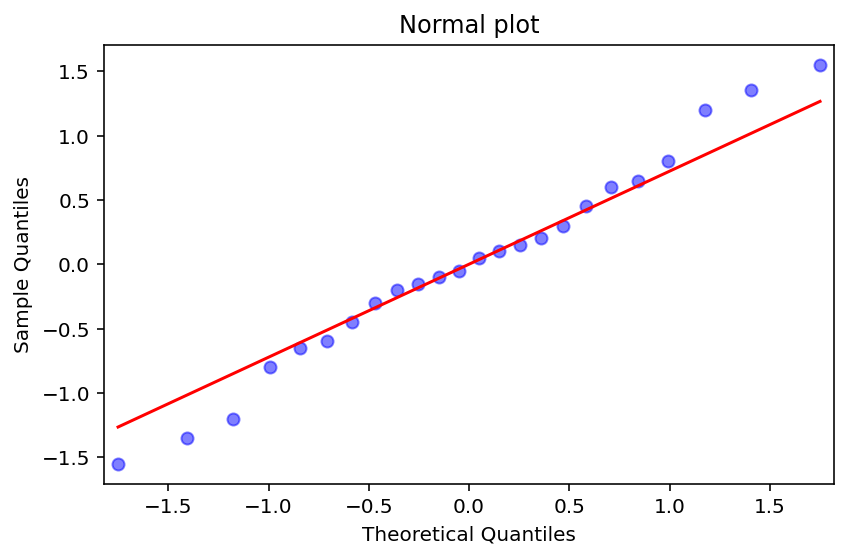

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl2.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

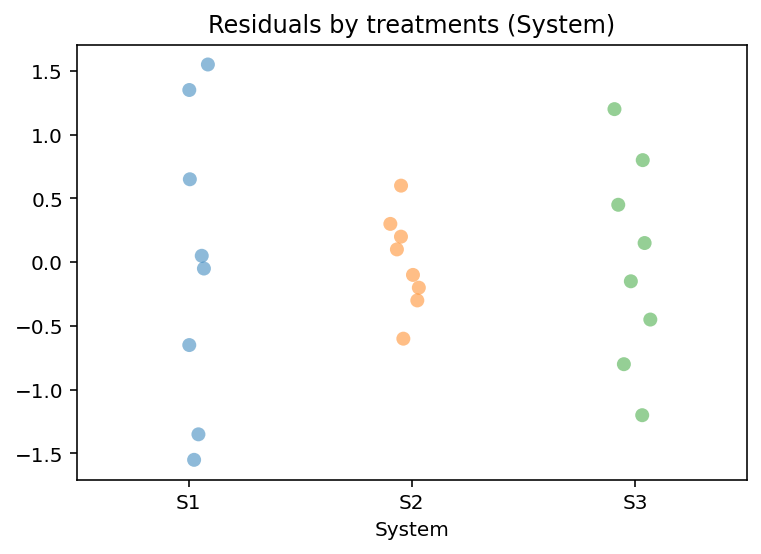

In [ ]:
sns.stripplot(x=missile_data['System'], y=mdl2.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (System)')
pass;

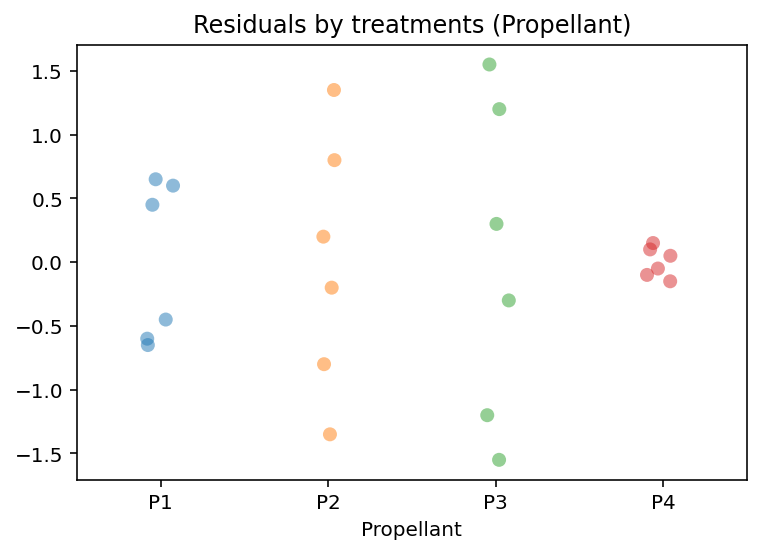

In [ ]:
sns.stripplot(x=missile_data['Propellant'], y=mdl2.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Propellant)')
pass;

In [ ]:
from statsmodels.stats.libqsturng import qsturng

a = len(missile_data.System.unique())
f = mdl2.df_resid
n = missile_data.groupby(['System','Propellant']).count().reset_index().iloc[0,-1]

In [ ]:
alpha=0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl2.mse_resid/n)
print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 3.77
Margin error: 2.97


In [ ]:
from statsmodels.stats.libqsturng import qsturng
import itertools
s1 = missile_data.query('System == "S1"')
group_mean = s1.groupby('Propellant').aggregate({'BurningRate':'mean'}).BurningRate
allpairs=list(itertools.combinations(sorted(missile_data.Propellant.unique()),2))
tukey_df = pd.DataFrame(allpairs, columns={'group1','group2'})
tukey_df['meandiff'] = tukey_df.apply(lambda x: group_mean[x['group1']] - group_mean[x['group2']], axis=1) 
tukey_df['lower'] = tukey_df.apply(lambda x: x['meandiff'] - margin_err, axis=1) 
tukey_df['upper'] = tukey_df.apply(lambda x: x['meandiff'] + margin_err, axis=1) 
tukey_df['reject'] = tukey_df.apply(lambda x: 'False' if x['lower'] < 0 and x['upper'] > 0 else 'True', axis=1) 
tukey_df

,group1,group2,meandiff,lower,upper,reject
0,P1,P2,1.9,-1.072337,4.872337,False
1,P1,P3,5.1,2.127663,8.072337,True
2,P1,P4,4.4,1.427663,7.372337,True
3,P2,P3,3.2,0.227663,6.172337,True
4,P2,P4,2.5,-0.472337,5.472337,False
5,P3,P4,-0.7,-3.672337,2.272337,False


## Three-factor ANOVA

### Load data and fit model

In [ ]:
softdrink_data = pd.read_excel('/content/lect05-factorial.xlsx', sheet_name='Softdrink', header=0)
softdrink_data

,Filldeviation,Carbonation,Pressure,Linespeed
0,-3,10,25,200
1,-1,10,25,200
2,-1,10,25,250
3,0,10,25,250
4,-1,10,30,200
5,0,10,30,200
6,1,10,30,250
7,1,10,30,250
8,0,12,25,200
9,1,12,25,200


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Filldeviation ~ C(Carbonation) + C(Pressure) + C(Linespeed) + C(Carbonation):C(Pressure) + \
C(Carbonation):C(Linespeed) + C(Pressure):C(Linespeed) + C(Carbonation):C(Pressure):C(Linespeed)'
mdl = ols(formula, data=softdrink_data).fit()
aov_table = anova_lm(mdl) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Carbonation),2.0,252.750000,126.375000,178.411765,1.186249e-09
C(Pressure),1.0,45.375000,45.375000,64.058824,3.742257e-06
C(Linespeed),1.0,22.041667,22.041667,31.117647,1.202174e-04
C(Carbonation):C(Pressure),2.0,5.250000,2.625000,3.705882,5.580812e-02
C(Carbonation):C(Linespeed),2.0,0.583333,0.291667,0.411765,6.714939e-01
C(Pressure):C(Linespeed),1.0,1.041667,1.041667,1.470588,2.485867e-01
C(Carbonation):C(Pressure):C(Linespeed),2.0,1.083333,0.541667,0.764706,4.868711e-01
Residual,12.0,8.500000,0.708333,NaN,NaN


### Main and interaction effect plots

Text(0.5, 0, 'Carbonation (A)')

Text(0, 0.5, 'Average fill deviation')

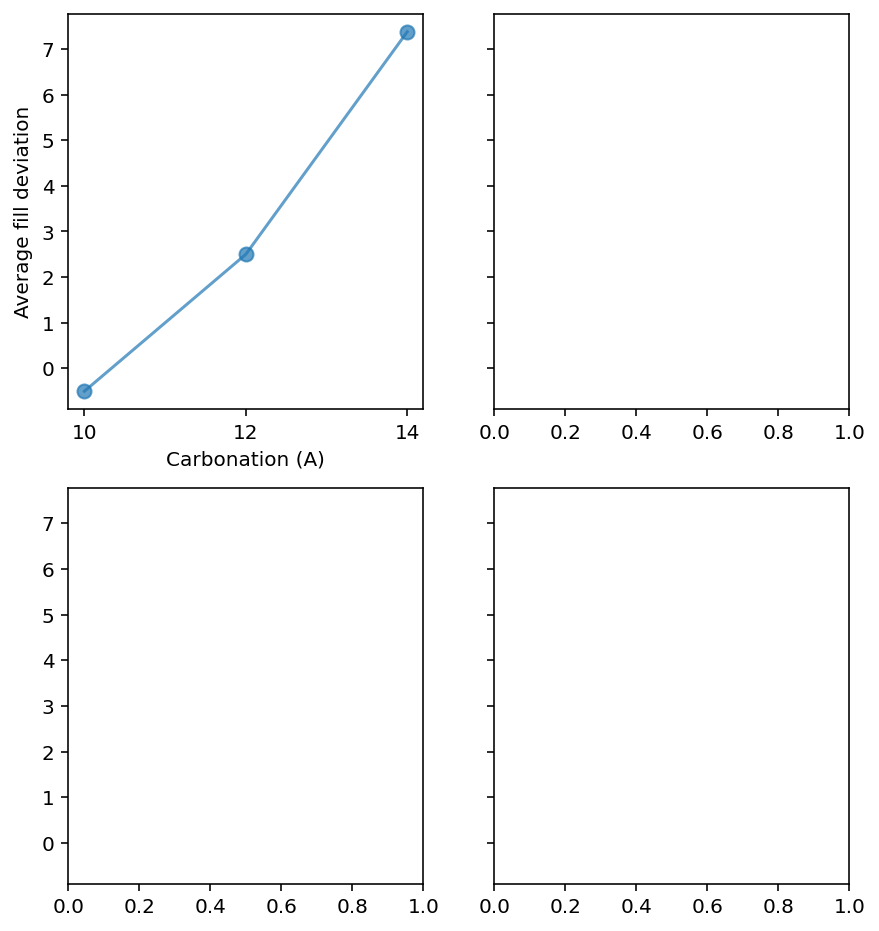

In [ ]:
## Create figure with four subplots inside
# Main effect plots of Carbonation, Pressure and Linespeed (ax1, ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(7,8)) 


carb_effect=softdrink_data.groupby('Carbonation').aggregate({'Filldeviation':'mean'}).reset_index()
ax1.plot(carb_effect.Carbonation.astype('str'), carb_effect.Filldeviation,
        ms=7, marker='o', alpha=0.7)
ax1.set_xlabel('Carbonation (A)')
ax1.set_ylabel('Average fill deviation')

### Your Turn: Try adding more plots on the figure
# Main effect plots of Pressure and Linespeed (ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)
# ..................
